In [1]:
import pandas as pd
import numpy as np

## Pandas обладает удобным инструментарием для построения писательных статистик

### 0.Describe

In [11]:
df = pd.DataFrame({'feature_1' : np.random.randn(10000),
                   'feature_2' : np.random.randn(10000)*3 + 4.,
                   'feature_3' : np.random.randn(10000)*0.1 - 3.})

In [12]:
df

,feature_1,feature_2,feature_3
0,-2.101829,5.505692,-3.000309
1,0.485408,5.376984,-2.913276
2,1.475984,3.556904,-3.113501
3,0.468304,2.623395,-3.177368
4,-1.338332,1.784057,-2.948592
...,...,...,...
9995,-0.426306,2.425921,-3.016269
9996,-0.393861,2.807778,-3.059616
9997,-1.013117,5.460823,-3.128819
9998,-0.763573,1.778473,-2.986321


In [13]:
df.describe()


,feature_1,feature_2,feature_3
count,10000.000000,10000.000000,10000.000000
mean,0.000681,4.002254,-3.002825
std,0.993858,3.030977,0.099570
min,-4.368209,-7.321078,-3.369270
25%,-0.675708,1.939984,-3.069872
50%,0.004906,3.995243,-3.002619
75%,0.680668,6.039820,-2.935126
max,3.577490,15.805967,-2.598051


In [15]:
df = pd.read_csv('abalone.csv')

In [16]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### I.Скользящие окна

In [20]:
def plot_rolling(df):
    plt.figure(figsize=(20,12))
    plt.plot(df.index, df.Y, label='raw data')
    plt.plot(df.Y.rolling(window=25).mean(), label="rolling mean");
    plt.plot(df.Y.rolling(window=25).std(), label="rolling std (x10)");
    plt.legend()

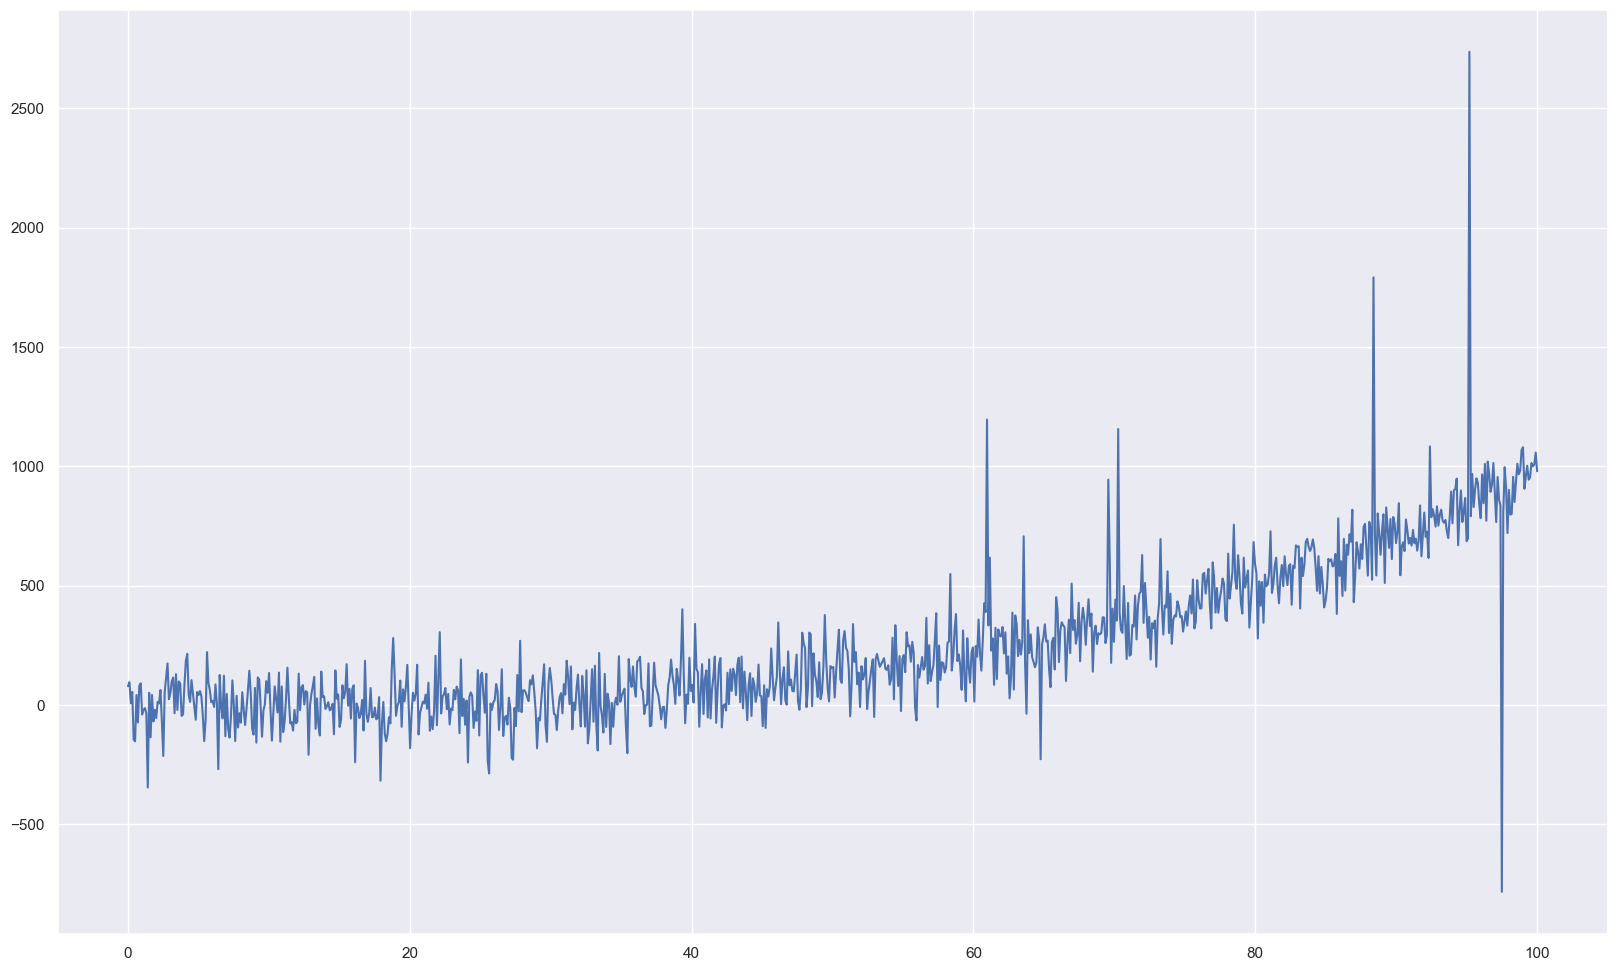

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()


#plt.style.use('seaborn-colorblind')


f = lambda x: x**3 - 2*x**2 + x - 1
f_q = lambda x: f(x)/1000 + np.random.randn(1)*100
X = np.linspace(0,100,1000)
Y = np.array([f_q(x) for x in X])
for i in range(20):
    ind = np.random.choice(np.arange(1000))
    Y[ind] = Y[ind]+np.random.choice([1,-1],p=[0.7,0.3])*Y[ind]/0.5
plt.figure(figsize=(20,12))
plt.plot(X,Y)


In [30]:
df = pd.DataFrame({'Y' : Y.reshape(-1)})

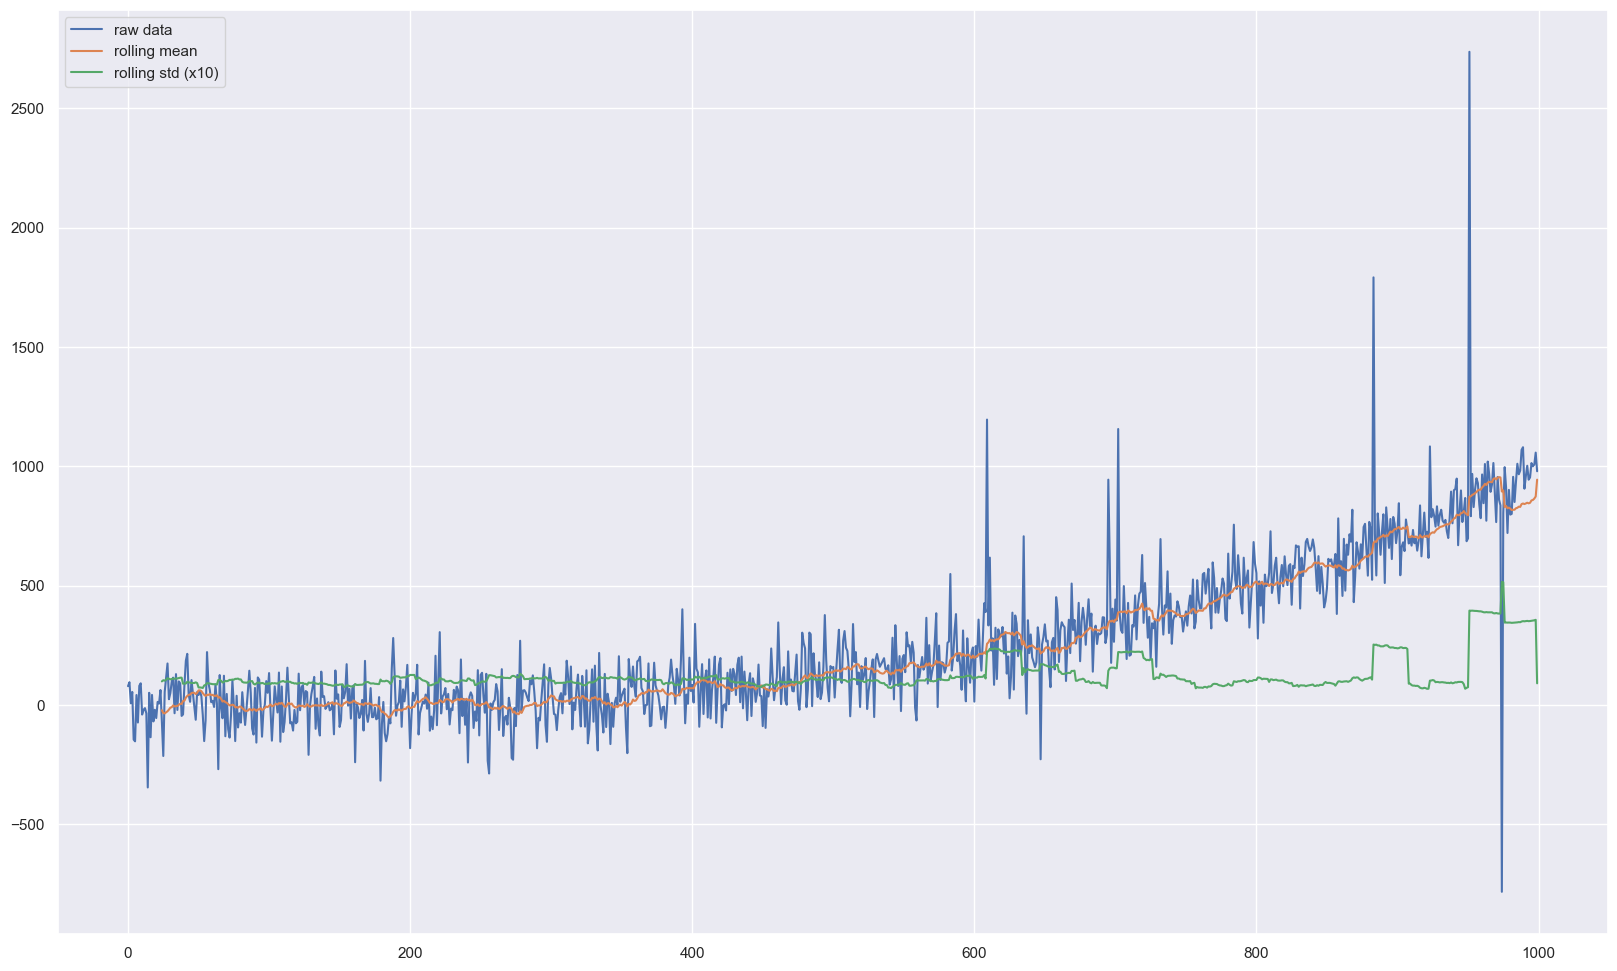

In [31]:
plot_rolling(df)

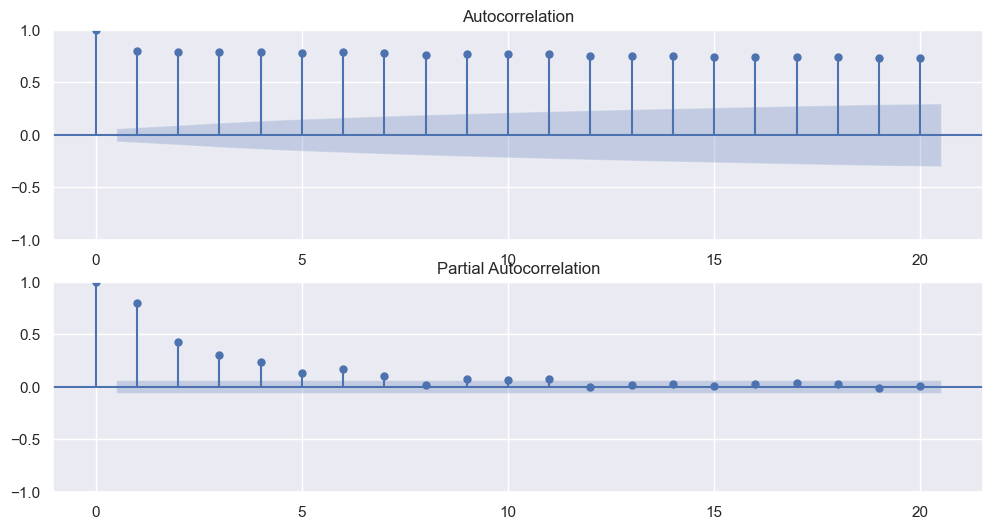

In [32]:
#Автокорреляции

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df.Y.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(df.Y.dropna(), ax=ax[1], lags=20)

### II. EWM и сглаживание 
<img src="ema.PNG">
<img src="pdema.PNG">

In [33]:
df = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
df.ewm(com=1)

ExponentialMovingWindow [com=1,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [34]:
df.ewm(com=1).mean()

,B
0,0.000000
1,0.666667
2,1.428571
3,2.266667
4,3.161290


### III.Борьба с выбросами при помощи ewm

In [35]:
df = pd.DataFrame({'Y' : Y.reshape(-1)})

In [36]:
df['ewm'] = df.Y.ewm(10).mean()

In [37]:
df['true_f'] = [f(x)/1000 for x in X]

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

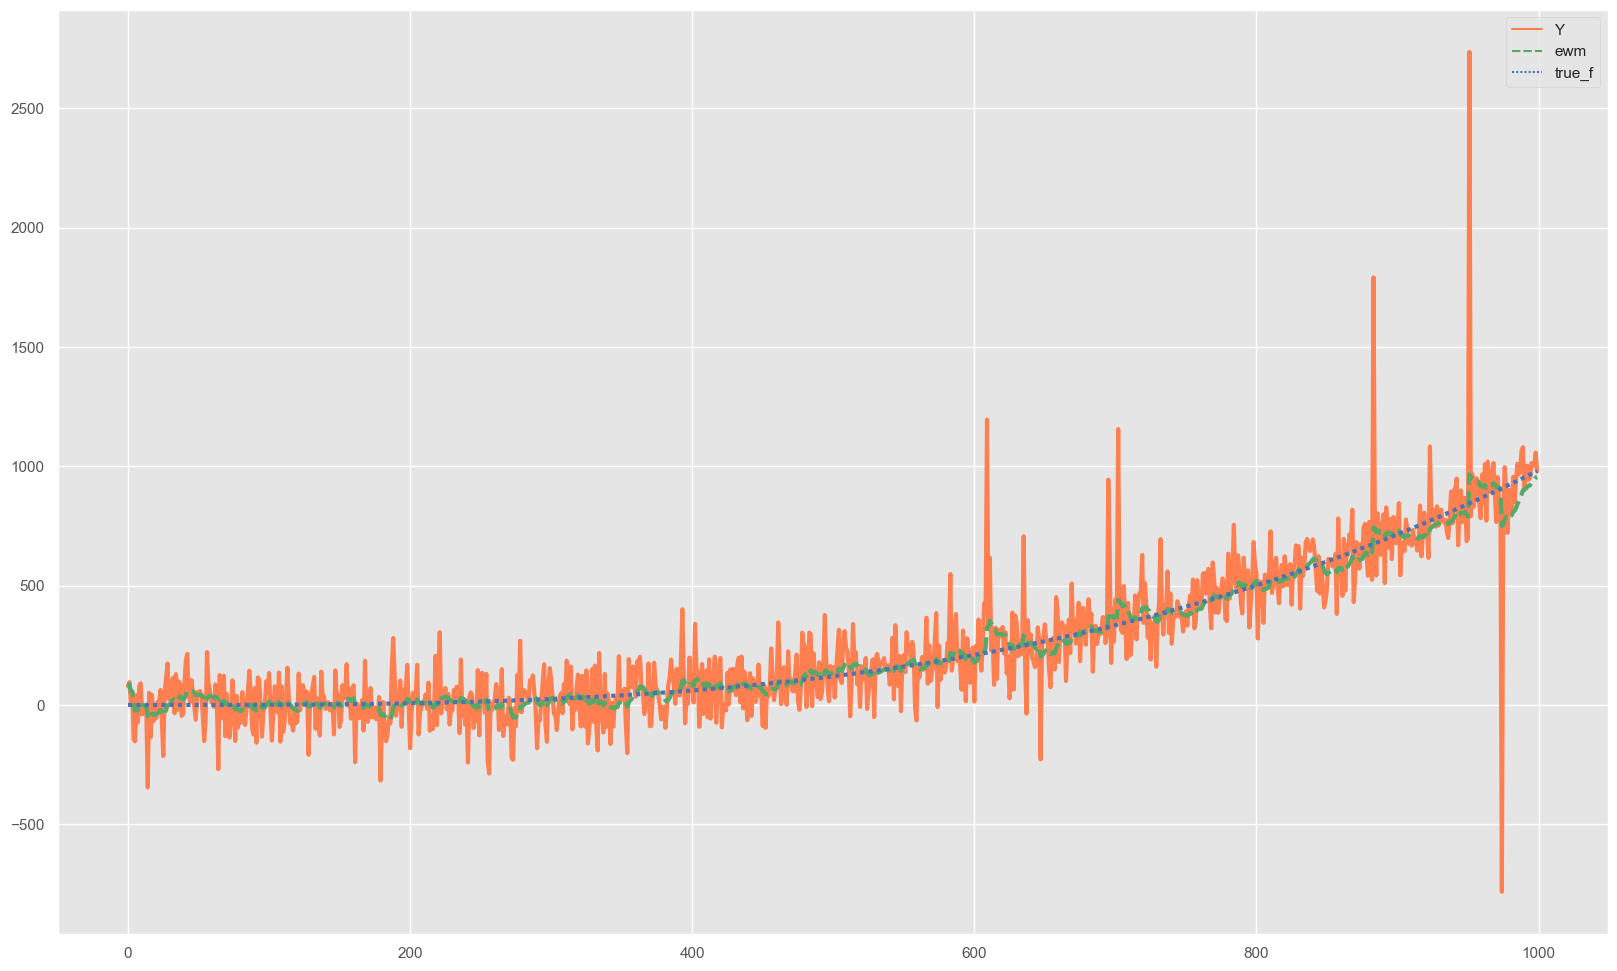

In [38]:
plt.figure(figsize=(20,12))
plt.style.use('ggplot')
#plt.grid()
sns.lineplot(data = df, palette=['#ff7f50','g','b'], linewidth=3)

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

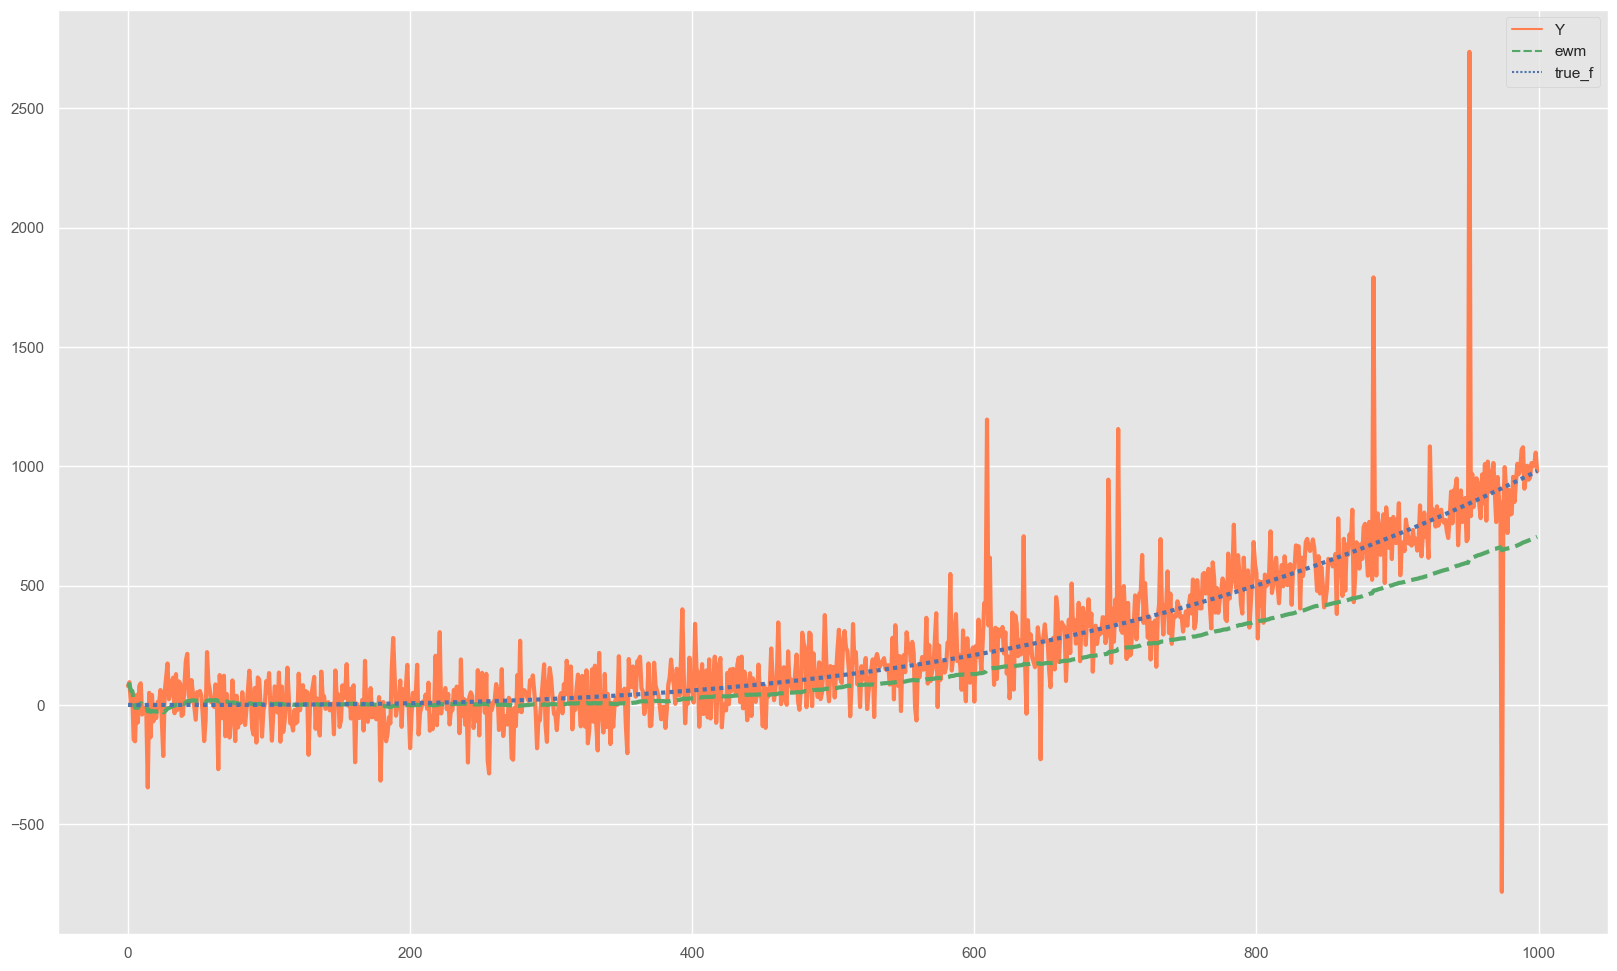

In [39]:
"""
Изменим размер окна
"""

df = pd.DataFrame({'Y' : Y.reshape(-1)})
df['ewm'] = df.Y.ewm(120).mean()
df['true_f'] = [f(x)/1000 for x in X]

plt.figure(figsize=(20,12))
#plt.grid()
sns.lineplot(data = df, palette=['#ff7f50','g','b'], linewidth=3)

C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dboy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

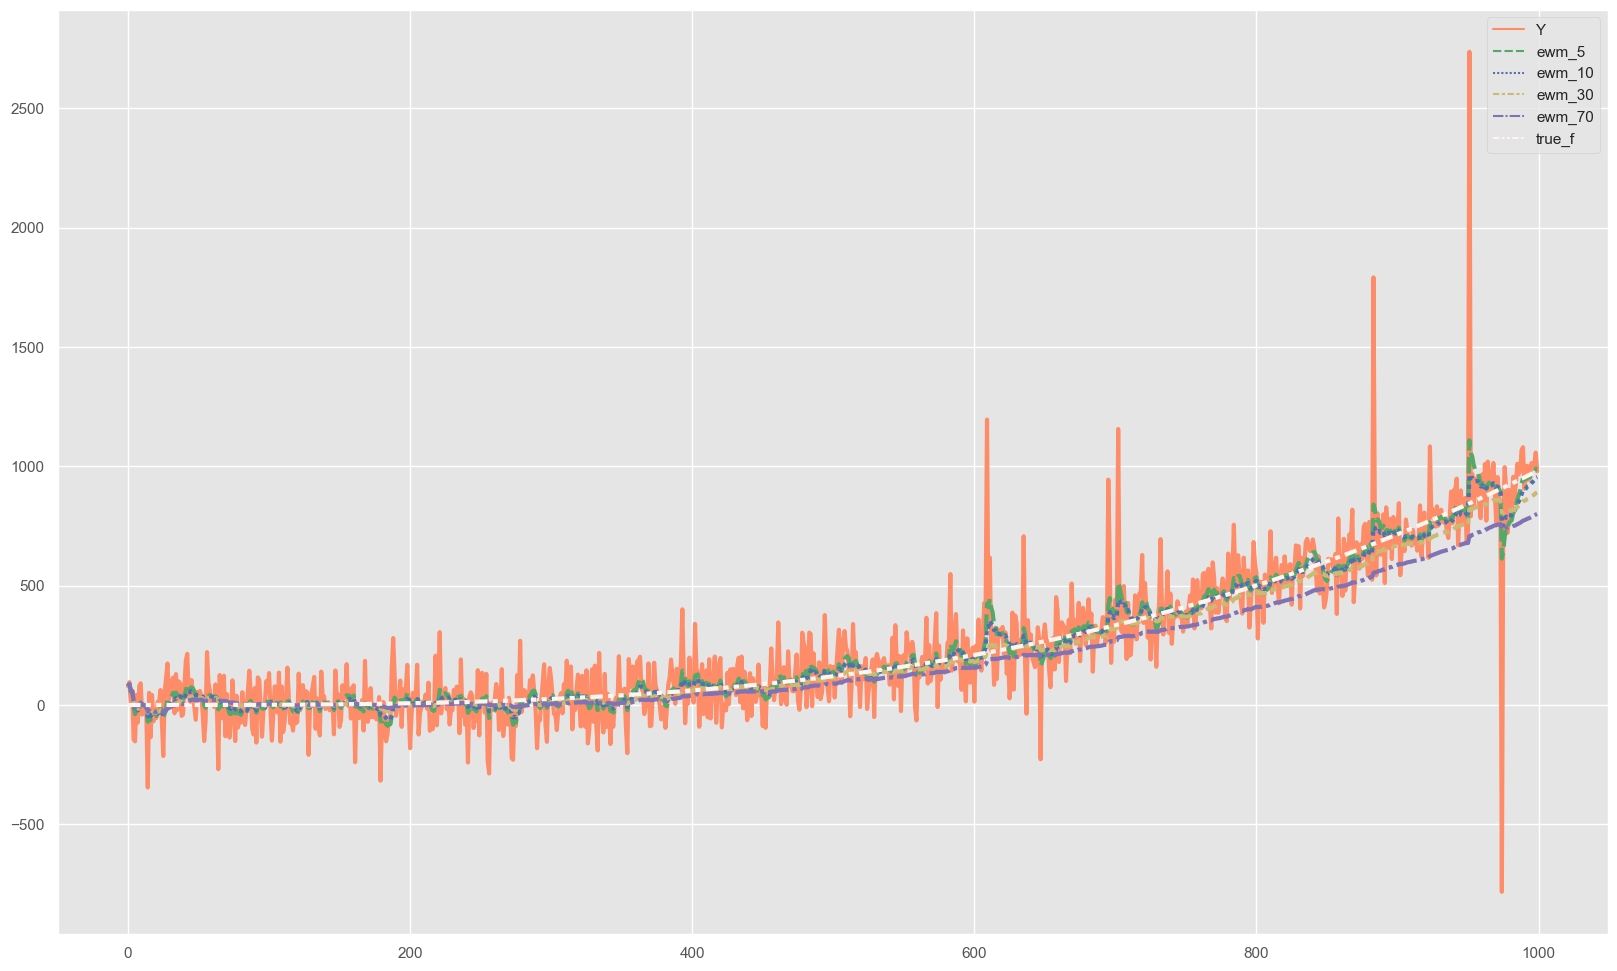

In [40]:
"""
Посмотрим на окна разного размера
"""

df = pd.DataFrame({'Y' : Y.reshape(-1)})
df['ewm_5'] = df.Y.ewm(5).mean()
df['ewm_10'] = df.Y.ewm(10).mean()
df['ewm_30'] = df.Y.ewm(30).mean()
df['ewm_70'] = df.Y.ewm(70).mean()
df['true_f'] = [f(x)/1000 for x in X]

plt.figure(figsize=(20,12))
#plt.grid()
sns.lineplot(data = df, palette=['#ff8c69','g','b', 'y', 'm', "#fff5ee"], linewidth=3)